In [5]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os
import shutil  


### Define path and read annotation file

In [6]:
dataDir='..'
dataType='train2017'
annFile="annotations/instances_train2017.json".format(dataDir,dataType)

# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=33.85s)
creating index...
index created!


### Check that an image can be shown

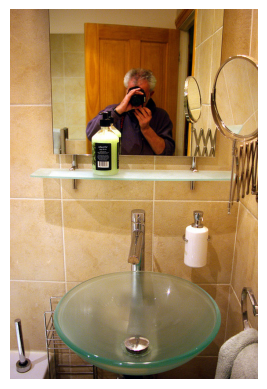

In [7]:
imgIds = coco.getImgIds()
img = coco.loadImgs(imgIds[64])[0]

I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()


### Save 2500 images of each category in the desired format

In [8]:
# Get ID for 'car, person or traffic light' category
catIds = coco.getCatIds(catNms=['person'])

# Get all images containing the category
imgIds = coco.getImgIds(catIds=catIds)
selected_imgIds = imgIds[:2500]
save_dir = 'testdir_person'
os.makedirs(save_dir, exist_ok=True)
coco_images_dir = "train2017"


# Process each image
for img_id in selected_imgIds:
    img = coco.loadImgs(img_id)[0]
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)

    # Create a text file for each image
    file_name = os.path.join(save_dir, f"{img['file_name'].split('.')[0]}.txt")
    with open(file_name, 'w') as f:

        # Write category_id and bbox to the file
        category_id = anns[0]['category_id']
        bbox = anns[0]['bbox']  
        bbox_str = ' '.join(map(str, bbox))
        f.write(f"{category_id} {bbox_str}\n")

    source_image_path = os.path.join(coco_images_dir, img['file_name'])
    destination_image_path = os.path.join(save_dir, img['file_name'])
    shutil.copy(source_image_path, destination_image_path)
